<a href="https://colab.research.google.com/github/morgangere/Predicting_FIfa_2022/blob/main/FIFA_IST718_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fifa Cup Predictons: 
Authors: Rene J Colocho, Jack Dolitsky, Brian Depalma, Morgan Gere
12/20/22


Summary of Findings:

After performing the initial model creation using cross validation as a tool to see how the model predicts winners, we can see that it does a poor job with predicting draws (games where the score is tied).  This is because draws are only accepted in the first round of the tounament.  The preciding rounds have rules such as if a game is tied the team with less penelties wins.  The games ending in a draw were removed and the accuracy increased dramatically.  When tested against the test set the findings were much lower telling use the models are overfitting to the data.

Recommendations:

The model should be run on the first stage and bets be placed for the round only.  After the round is done the actual winners who are moving on should be placed into the model and the subsequent winners should be predicted placing bets again.  This will give the best results in winning bets.  The model performs better in later rounds as there are no draws.







Specification:

Every four years, the Federation Internationale de Football Association (FIFA), the governing body for international soccer, hosts a tournament with the goal of crowning the best country in the world. FIFA's membership is comprised of 211 national association from across the globe. Each of these national associations must be a member of one of the six regional confederations that the world has been divided into - Africa (CAF), Asia and Australia (AFC), Europe (UEFA), North and Central America and the Caribbean (CONCACAF), Oceania (OFC) and South America (CONMEBOL). 

This International tournament first started in 1930 and has occurred every four years since, with the exception of 1942 and 1946 due to World War Two. The format includes a qualifying phase which occurs in the preceding three years to the tournament. This phase determines which 32 teams qualify to play in the tournament phase. The tournament phase consists of a group stage where four teams each play each other one time. The top two teams from each group advance into the round of 16 which becomes a single elimination tournament to determine the winner. 

The goal of this project is to accurately predict the winner of the 2022 World Cup tournament using historical data from all of the preceding World Cup tournaments. This analysis may be useful in a couple of ways to varying groups of people. It would hopefully be most useful to the teams themselves who are looking to identify what makes a winning team. What characteristics do all of the previous winners share? In addition, while we don't condone using this for gambling purposes, it may be useful in that regard as well. 

In [ ]:
from google.colab import files
import io
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving Elo_Ratings.csv to Elo_Ratings.csv
Saving fifa_ranking.csv to fifa_ranking.csv
Saving last_five.csv to last_five.csv
Saving rankings.csv to rankings.csv
Saving Test_set.csv to Test_set.csv
Saving wcmatches.csv to wcmatches.csv


To start, data was collected from the internet and loaded into the workspace. Multiple data sets were found and pulled in to see what could be useful for the analysis. Each data set will be explained as it is brought in.  

The test set for our analysis would be the 2022 schedule of games. The model would be created using the training data, which is pulled in later, and subsequently ran on the test set to determine the outcomes for each game in this years tournament, hopefully giving an accurate prediction of this years winner. A look at some of the test data set can be seen below. 

It is important to note that the actual teams that won were placed in the subsequnet rounds not the predictions of the model as any error in the first round predictions would cause a cascade of errors in the preceeding rounds resulting in a very poor prediction rate. 

In [ ]:
testdf = pd.read_csv('Test_set.csv')

In [ ]:
testdf

,stage,home_team,away_team,year,outcome
0,Group A,Qatar,Ecuador,2022,A
1,Group A,Senegal,Netherlands,2022,A
2,Group A,Qatar,Senegal,2022,A
3,Group A,Netherlands,Ecuador,2022,D
4,Group A,Ecuador,Senegal,2022,A
...,...,...,...,...,...
59,Quarterfinals,Morocco,Portugal,2022,H
60,Semifinals,Argentina,Croatia,2022,H
61,Semifinals,France,Morocco,2022,H
62,Third place,Croatia,Morocco,2022,H


In [ ]:
# Removing rows without info for the time being
#testdf=testdf[0:60]

In [ ]:
# When trying to select by name under the country column nothing would show up.
# When selecting the column to list extra items were discovered in the names shown below
# this will be fixed for both home and away
testdf['home_team'].to_list()


['Qatar\xa0',
 'Senegal\xa0',
 'Qatar\xa0',
 'Netherlands\xa0',
 'Ecuador\xa0',
 'Netherlands\xa0',
 'England\xa0',
 'United States\xa0',
 'Wales\xa0',
 'England\xa0',
 'Wales\xa0',
 'Iran\xa0',
 'Argentina\xa0',
 'Mexico\xa0',
 'Poland\xa0',
 'Argentina\xa0',
 'Poland\xa0',
 'Saudi Arabia\xa0',
 'Denmark\xa0',
 'France\xa0',
 'Tunisia\xa0',
 'France\xa0',
 'Australia\xa0',
 'Tunisia\xa0',
 'Germany\xa0',
 'Spain\xa0',
 'Japan\xa0',
 'Spain\xa0',
 'Japan\xa0',
 'Costa Rica\xa0',
 'Morocco\xa0',
 'Belgium\xa0',
 'Belgium\xa0',
 'Croatia\xa0',
 'Croatia\xa0',
 'Canada\xa0',
 'Switzerland\xa0',
 'Brazil\xa0',
 'Cameroon\xa0',
 'Brazil\xa0',
 'Serbia\xa0',
 'Cameroon\xa0',
 'Uruguay\xa0',
 'Portugal\xa0',
 'South Korea\xa0',
 'Portugal\xa0',
 'Ghana\xa0',
 'South Korea\xa0',
 'Netherlands\xa0',
 'Argentina',
 'Japan',
 'Brazil',
 'England',
 'France',
 'Morocco\xa0',
 'Portugal\xa0',
 'Netherland',
 'Croatia',
 'England',
 'Morocco',
 'Argentina',
 'France',
 'Croatia',
 'Argentina']

In [ ]:
home = ['Qatar', 'Senegal', 'Qatar', 'Netherlands', 'Ecuador', 'Netherlands', 'England', 'United States', 'Wales', 'England', 'Wales', 'Iran', 'Argentina', 'Mexico', 'Poland', 'Argentina', 'Poland', 
 'Saudi Arabia', 'Denmark', 'France', 'Tunisia', 'France', 'Australia', 'Tunisia', 'Germany', 'Spain', 'Japan', 'Spain', 'Japan', 'Costa Rica', 'Morocco', 'Belgium', 'Belgium', 'Croatia', 'Croatia', 
 'Canada', 'Switzerland', 'Brazil', 'Cameroon', 'Brazil', 'Serbia', 'Cameroon', 'Uruguay', 'Portugal', 'South Korea', 'Portugal', 'Ghana', 'South Korea', 'Netherlands', 'Argentina',
 'Japan', 'Brazil', 'England', 'France', 'Morocco', 'Portugal', 'Netherlands', 'Croatia', 'England', 'Morocco',
 'Argentina', 'France', 'Croatia', 'Argentina'
 ]

In [ ]:
away = ['Ecuador', 'Netherlands', 'Senegal', 'Ecuador', 'Senegal', 'Qatar', 'Iran', 'Wales', 'Iran', 'United States', 'England', 'United States', 'Saudi Arabia', 'Poland', 'Saudi Arabia', 'Mexico', 'Argentina', 
 'Mexico', 'Tunisia', 'Australia', 'Australia', 'Denmark', 'Denmark', 'France', 'Japan', 'Costa Rica', 'Costa Rica', 'Germany', 'Spain', 'Germany', 'Croatia', 'Canada', 'Morocco', 'Canada', 'Belgium', 'Morocco',
 'Cameroon', 'Serbia', 'Serbia', 'Switzerland', 'Switzerland', 'Brazil', 'South Korea', 'Ghana', 'Ghana', 'Uruguay', 'Uruguay', 'Portugal', 'United States', 'Australia', 'Croatia', 
 'South Korea', 'Senegal', 'Poland', 'Spain', 'Switzerland', 'Argentina', 
 'Brazil', 'France', 'Portugal', 
 'Croatia', 'Morocco', 'Morocco', 'France'
 ]

In [ ]:
testdf['home_team']=home
testdf['away_team']=away


The test data set required a little bit of cleaning be done. The home and away teams contained extra characters that were making it difficult to extract teams we wanted to work with. For example, United States appeared as "United States/xaO". This is not an accurate representation of the country name and as noted it makes it more difficult to find what country is trying to be accessed, so the extra characters were removed. This was done by creating new variables for home and away team with the proper spelling of each country name, and then adding those variables back into the data frame as new columns.  This also corrected the names to be the same exact name as all other data sets.  Sticking with the United States data in some data sets it was writen as U.S. 

In [ ]:
matches_df = pd.read_csv('wcmatches.csv')

In [ ]:
# First look at the data frame
matches_df.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [ ]:
# Checking for null Values
matches_df.isna().sum()

year                0
country             0
city                0
stage               0
home_team           0
away_team           0
home_score          0
away_score          0
outcome             0
win_conditions    838
winning_team      169
losing_team       169
date                0
month               0
dayofweek           0
dtype: int64

Historical data from previous world cup matches was brought it. This data contained the winners and losers for each contest in previous world cup tournaments. This is the base of the traing data. 

The data frame is checked for any NA inputs and it is found that win_conditions, winning_team and losing_team are the only three variables with any NAs. Win_conditions states if the game went into overtime or if they won based off penalties. This is just extra information for each game that is not necessarily required for this analysis. Most games do not have these extra notes as they end in standard time so the NA values are high. This is not important to us because whether a team wins or loses in overtime or penalty shots, they still won or lost. If there is time to dive deeper, it may be worth looking at teams that perform better if the game goes into extra time but it is not totally necessary at this point, thus this column was removed. The NA values from the winning_team, losing_team are draws where neither team won or lost. This outcome can only happen in the group stage as once the teams enter the round of 16, games must end so a team can be eliminated.  Since the model will be predicting Outcome these columns were removed. 

In [ ]:
lastfive_df = pd.read_csv('last_five.csv')

In [ ]:
#Selecting only rows containing data
lastfive=lastfive_df.iloc[0:32]

In [ ]:
# Checking for null Values
lastfive.isna().sum()

Country            0
played             0
win                0
draw               0
loss               0
goals_for          0
goals_against      0
goal_difference    0
clean_sheet_%      0
btts%              0
fts                0
corners            0
cards              0
avg                0
dtype: int64

In [ ]:
# First look at the data frame
lastfive

,Country,played,win,draw,loss,goals_for,goals_against,goal_difference,clean_sheet_%,btts%,fts,corners,cards,avg
0,Wales,5.0,0.0,1.0,4.0,5.0,9.0,-4.0,0%,80%,20%,8.80,12.0,2.8
1,England,5.0,0.0,3.0,2.0,4.0,9.0,-5.0,20%,40%,60%,8.00,6.0,2.6
2,Poland,5.0,1.0,1.0,3.0,4.0,11.0,-7.0,20%,40%,40%,7.40,11.0,3.0
3,Saudi Arabia,5.0,1.0,2.0,2.0,1.0,2.0,-1.0,60%,0%,80%,8.80,3.0,0.6
4,France,5.0,1.0,2.0,2.0,4.0,5.0,-1.0,20%,40%,40%,12.40,4.0,1.8
5,Mexico,5.0,1.0,2.0,2.0,4.0,5.0,-1.0,40%,20%,60%,10.80,6.0,1.8
6,Cameroon,5.0,2.0,0.0,3.0,3.0,5.0,-2.0,20%,20%,60%,9.00,7.0,1.6
7,Germany,5.0,1.0,3.0,1.0,10.0,8.0,2.0,0%,80%,20%,8.80,8.0,3.6
8,Senegal,5.0,1.0,3.0,1.0,8.0,7.0,1.0,20%,80%,0%,8.20,1.0,3.0
9,Canada,5.0,2.0,0.0,3.0,7.0,5.0,2.0,40%,20%,40%,8.80,4.0,2.4


In [ ]:
# When trying to select by name under the country column nothing would show up.
# When selecting the column to list extra items were discovered in the names shown below
lastfive['Country'].to_list()

['\xa0Wales',
 '\xa0England',
 '\xa0Poland',
 '\xa0Saudi Arabia',
 '\xa0France',
 '\xa0Mexico',
 '\xa0Cameroon',
 '\xa0Germany',
 '\xa0Senegal',
 '\xa0Canada',
 '\xa0Qatar',
 '\xa0Iran',
 '\xa0USA',
 '\xa0Ghana',
 '\xa0Tunisia',
 '\xa0Japan',
 '\xa0Portugal',
 '\xa0Denmark',
 '\xa0Ecuador',
 '\xa0Switzerland',
 '\xa0Costa Rica',
 '\xa0Belgium',
 '\xa0Morocco',
 '\xa0South Korea',
 '\xa0Australia',
 '\xa0Uruguay',
 '\xa0Spain',
 '\xa0Argentina',
 '\xa0Serbia',
 '\xa0Croatia',
 '\xa0Netherlands',
 '\xa0Brazil']

In [ ]:
# creating a fixed list of country names
country=['Wales', 'England', 'Poland', 'Saudi Arabia', 'France', 'Mexico', 'Cameroon', 'Germany', 'Senegal',
         'Canada', 'Qatar', 'Iran', 'United States', 'Ghana', 'Tunisia', 'Japan', 'Portugal', 'Denmark', 'Ecuador', 
         'Switzerland', 'Costa Rica', 'Belgium', 'Morocco', 'South Korea', 'Australia', 'Uruguay', 'Spain', 
         'Argentina', 'Serbia', 'Croatia', 'Netherlands', 'Brazil']

In [ ]:
lastfive['country']=country

<ipython-input-19-75ea377fb73e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lastfive['country']=country


In [ ]:
lastfive.drop('Country',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
lastfive

,played,win,draw,loss,goals_for,goals_against,goal_difference,clean_sheet_%,btts%,fts,corners,cards,avg,country
0,5.0,0.0,1.0,4.0,5.0,9.0,-4.0,0%,80%,20%,8.80,12.0,2.8,Wales
1,5.0,0.0,3.0,2.0,4.0,9.0,-5.0,20%,40%,60%,8.00,6.0,2.6,England
2,5.0,1.0,1.0,3.0,4.0,11.0,-7.0,20%,40%,40%,7.40,11.0,3.0,Poland
3,5.0,1.0,2.0,2.0,1.0,2.0,-1.0,60%,0%,80%,8.80,3.0,0.6,Saudi Arabia
4,5.0,1.0,2.0,2.0,4.0,5.0,-1.0,20%,40%,40%,12.40,4.0,1.8,France
5,5.0,1.0,2.0,2.0,4.0,5.0,-1.0,40%,20%,60%,10.80,6.0,1.8,Mexico
6,5.0,2.0,0.0,3.0,3.0,5.0,-2.0,20%,20%,60%,9.00,7.0,1.6,Cameroon
7,5.0,1.0,3.0,1.0,10.0,8.0,2.0,0%,80%,20%,8.80,8.0,3.6,Germany
8,5.0,1.0,3.0,1.0,8.0,7.0,1.0,20%,80%,0%,8.20,1.0,3.0,Senegal
9,5.0,2.0,0.0,3.0,7.0,5.0,2.0,40%,20%,40%,8.80,4.0,2.4,Canada


The last five data set contains information about the teams that will be playing in the 2022 FIFA world cup.  This data set was used to created a simulator that will simulate games being played and give a score to place in the testing data.  The last five data set had a similar issue regarding the country names where there were extra characters. This was resolved the same way. 

In [ ]:
elo_rating_df = pd.read_csv('Elo_Ratings.csv')

In [ ]:
elo_rating_df

,rank,team,average_rating,average_rank,one_year_change_rating,one_year_change_rank,rating,total_games,home_games,away_games,neutral_games,wins,losses,draws,goals,goals_against
0,1,Brazil,2169,4,1999,0,20,1026,364,331,331,654,161,211,2230,912
1,2,Argentina,2143,5,1984,1,42,1061,368,405,288,573,225,263,2001,1107
2,3,Spain,2048,7,1941,2,11,737,324,290,123,431,135,171,1478,662
3,4,Netherlands,2040,15,1844,8,111,853,405,345,103,438,230,185,1774,1090
4,5,Belgium,2025,23,1751,−1,−50,833,401,358,74,369,293,171,1514,1321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,Tonga,528,210,663,0,0,62,8,14,40,14,42,6,70,242
235,236,Niue,496,222,496,0,0,2,0,0,2,0,2,0,0,33
236,237,Eastern Samoa,472,222,473,0,0,51,0,13,38,4,45,2,30,340
237,238,Northern Mariana Islands,404,229,524,0,−5,28,3,11,14,3,23,2,33,121


In [ ]:
fifa_ranking_df = pd.read_csv('fifa_ranking.csv')

In [ ]:
# Checking for null Values
fifa_ranking_df.isna().sum()

RK                 0
Team               0
Total Points       0
Previous Points    0
+/-                0
dtype: int64

In [ ]:
# First look at the data frame
fifa_ranking_df

,RK,Team,Total Points,Previous Points,+/-
0,1,Brazil,1841.30,1837.56,3.74
1,2,Belgium,1816.71,1821.92,-5.21
2,3,Argentina,1773.88,1770.65,3.23
3,4,France,1759.78,1764.85,-5.07
4,5,England,1728.47,1737.46,-8.99
...,...,...,...,...,...
206,207,Sri Lanka,825.25,825.25,0.00
207,208,US Virgin Islands,823.97,823.97,0.00
208,209,British Virgin Islands,809.32,809.32,0.00
209,210,Anguilla,790.74,790.74,0.00


ELO rankings and FIFA rankings for all teams were both brought in. The ranking systems differ slightly but they are similar and use mostly the same qualifications to rank teams. 

Rankings of all teams from 1994 to 2018 were obtained from kaggle and placed into a data frame.  The dates of the final ranking directly before the FIFA world cup were put into a list and the data frame was reduced to only the ranking occuring on these dates.  The years were pulled out and these rankings were the rankings for the FIFA world cup held that year.  A few countries had different names and were corrected in the full country name list and the data frame was reduced to include only the year the rankings and the country name. in 1998 Serbia was still listed as Yugolasvia and a special row was added for this purpose.  Two functions were created, one that took the full data frame and selected only one year at a time, then took the countries listed in the that temporary data frame that were home teams and saved that list.  It took the rankings data frame and made a second temporary data frame for the same year only of the rankings.  It then located the rank for each home team from the list.  This was then placed into a list of lists.  The list of lists was placed into a loop that pulled out each rank and placed it into a new list.  This new list was placed into a new column in the data frame.  Columns that were unrelated to prediction were dropped, leaving one data frame with all the predictors include the home teams FIFA rankings.  The second function did the exact same things, only it did it for the away team and again, that list of lists was placed into a list and made into a column on the training data frame.

The data prior to 1994 was not used because 1994 marks the start of the current format. The number of teams involved in the tournament becomes almost what it is today. It is found in data exploration later on that 1994 has two less groups than currently, then in 1996 the tournament finds its current number of teams. This data set would become the final training data set. 

In [ ]:
rankings_df = pd.read_csv('rankings.csv')

In [ ]:
rankings_df

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.00,0.00,0,UEFA,12/31/1992
1,96,Syria,SYR,11.00,0.00,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,12/31/1992
3,99,Latvia,LVA,10.00,0.00,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.00,0.00,0,CAF,12/31/1992
...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,10/6/2022
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,10/6/2022
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,10/6/2022
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,10/6/2022


In [ ]:
# Creating a year column for rankings_df
rankings_df['year'] = pd.to_datetime(rankings_df['rank_date']).dt.year

In [ ]:
# Creating a dataframe that is only 1994 and beyond
df=matches_df[matches_df['year']>=1994]

In [ ]:
# list of last ranking before the fifa world cup for each fifa world cup 1994 and beyond
fifa_dates = ['6/14/1994','5/20/1998','5/15/2002','5/17/2006','5/26/2010','6/5/2014','6/7/2018','10/6/2022']

In [ ]:
# Getting only the rankings for the dates directly before the fifa world cup
rankdf=rankings_df.loc[rankings_df['rank_date'].isin(fifa_dates)]

In [ ]:
# Dropping columns not needed
rankdf.drop('country_abrv',axis=1,inplace=True)
rankdf.drop('total_points',axis=1,inplace=True)
rankdf.drop('previous_points',axis=1,inplace=True)
rankdf.drop('rank_change',axis=1,inplace=True)
rankdf.drop('confederation',axis=1,inplace=True)
rankdf.drop('rank_date',axis=1,inplace=True)
rankdf

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,rank,country_full,year
1525,55,Senegal,1994
1526,54,Canada,1994
1527,53,Israel,1994
1528,51,Costa Rica,1994
1529,52,Japan,1994
...,...,...,...
63911,74,El Salvador,2022
63912,75,Oman,2022
63913,76,Israel,2022
63914,78,Georgia,2022


In [ ]:
# Obtaining the country names in a list to fix some that are different in rankings vs our df that the rankings need to be added to
country_fix = rankdf['country_full'].to_list()

In [ ]:
# Fixing the country names so they will be the same in both data frames
fixed_country=[]
for country in country_fix:
    if country == 'USA': 
        fixed_country.append('United States')
    elif country == 'Korea DPR': 
        fixed_country.append('North Korea')
    elif country == 'Korea Republic': 
        fixed_country.append('South Korea')
    elif country == 'Yugoslavia': 
        fixed_country.append('FR Yugoslavia')
    elif country == 'Serbia and Montenegro': 
        fixed_country.append('Serbia')
    elif country == 'IR Iran': 
        fixed_country.append('Iran')
    elif country == "CÃ´te d'Ivoire": 
        fixed_country.append('Ivory Coast')
    else:
        fixed_country.append(country)

In [ ]:
# Dropping the old country names and added the list of newly corrected country names
rankdf.drop('country_full',axis=1,inplace=True)
rankdf['country_full']=fixed_country

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-36-642a38c42bcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankdf['country_full']=fixed_country


In [ ]:
# creating a diction for Serbia for 1998 because it is in the data frame of rankings as Yugolsavia because they had just broken off
# also before they were not allowed to play because of sanctions
addition={'rank':8,'year':1998, 'country_full':'Serbia'}

In [ ]:
# adding the dictionary to the rankings data frame
rankdf=rankdf.append(addition,ignore_index=True)

In [ ]:
rankdf

,rank,year,country_full
0,55,1994,Senegal
1,54,1994,Canada
2,53,1994,Israel
3,51,1994,Costa Rica
4,52,1994,Japan
...,...,...,...
1571,75,2022,Oman
1572,76,2022,Israel
1573,78,2022,Georgia
1574,211,2022,San Marino


The ranking data set contains many ranks that are not about the FIFA world cup and the data set is windled down to just the ones that pertain and the dates are changed to the year to make it easier for the function to pull out the ranks needed. The function takes the df containing the teams in the fifa world cup and the data frame containing the rankings and makes temporary data frames with only the year that was input.  It then pulls the list of home team or away team to a list and pulls out the rankings for the name and saves it to a list in that order.  When used in a loop with each year the fifa world cup is held it will produce a list of the rankings for home team in order so it can be added to the data frame then repeated for the away team.

In [ ]:
# pulls out home team list for a specfic year then finds the ranks for the team
# places it in a list
def rank_home_lookup(df,df2,year):
    
    tempdf=df[df['year']==year]
    temprankdf=df2[df2['year']==year]
    tempdf.reset_index(inplace = True)
    temprankdf.reset_index(inplace = True)
    
    homerank=[]
    templist=tempdf['home_team'].to_list()
    for team in templist:
        try:
            a=temprankdf.loc[temprankdf['country_full']==team]['rank'].values[0]
            homerank.append(a)
        except:
            homerank.append([team,year])
    return(homerank)

In [ ]:
# pulls out away team list for a specfic year then finds the ranks for the team
# places it in a list
def rank_away_lookup(df,df2,year):

    tempdf=df[df['year']==year]
    temprankdf=df2[df2['year']==year]
    tempdf.reset_index(inplace = True)
    temprankdf.reset_index(inplace = True)
    
    awayrank=[]
    templist=tempdf['away_team'].to_list()
    for team in templist:
        try:
            a=temprankdf.loc[temprankdf['country_full']==team]['rank'].values[0]
            awayrank.append(a)
        except:
            awayrank.append([team,year])
    return(awayrank)

In [ ]:
# list of each year a FIFA world Cup was held
fifa_years=[1994,1998,2002,2004,2006,2010,2014,2018]

In [ ]:
# Using the away team function for each year a fifa world cup was held
away_team_rank=[]
for year in fifa_years:
    away_team_rank.append(rank_away_lookup(df,rankdf,year))

In [ ]:
# taking the list and selecting items from each list in the list and placing them into one new list
away_rank = []
for lista in away_team_rank:
    for rank in lista:
        away_rank.append(rank)

In [ ]:
# Using the home team function for each year a fifa world cup was held
home_team_rank=[]
for year in fifa_years:
    home_team_rank.append(rank_home_lookup(df,rankdf,year))

In [ ]:
# taking the list and selecting items from each list in the list and placing them into one new list
home_rank = []
for lista in home_team_rank:
    for rank in lista:
        home_rank.append(rank)

In [ ]:
# adding the rankings for both home teams and away teams
df['home_team_rank']=home_rank
df['away_team_rank']=away_rank

<ipython-input-47-659420a5cb60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_team_rank']=home_rank
<ipython-input-47-659420a5cb60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_team_rank']=away_rank


In [ ]:
# Dropping extra columns
df.drop('country',axis=1,inplace=True)
df.drop('city',axis=1,inplace=True)
df.drop('win_conditions',axis=1,inplace=True)
df.drop('winning_team',axis=1,inplace=True)
df.drop('losing_team',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('dayofweek',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# making sure the new data frame doesn't contain any null values
df.isna().sum()

year              0
stage             0
home_team         0
away_team         0
home_score        0
away_score        0
outcome           0
home_team_rank    0
away_team_rank    0
dtype: int64

In [ ]:
# the inital traning data frame
df.head()

,year,stage,home_team,away_team,home_score,away_score,outcome,home_team_rank,away_team_rank
464,1994,Group C,Germany,Bolivia,1,0,H,1,43
465,1994,Group C,Spain,South Korea,2,2,D,5,37
466,1994,Group A,Colombia,Romania,1,3,A,17,7
467,1994,Group E,Italy,Republic of Ireland,0,1,A,4,14
468,1994,Group A,United States,Switzerland,1,1,D,23,12


Exploratory Data Analysis - There are some visualizations of the data seen below. The first two graphs show the number of goals scored by the home team (first graph) or away team (second graph) and the outcome of the matches. It can be seen from these that there does not seem to be any sort of home field advantage in these tournaments. The home team seems to lose even scoring up to two goals in the first graph. Soccer does not typically see a lot of scoring in games so two goals can generally win a game. 

In [ ]:
df['year'].unique()

array([1994, 1998, 2002, 2006, 2010, 2014, 2018])

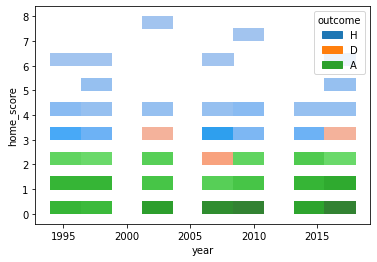

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = 'year', y = 'home_score', hue = 'outcome')

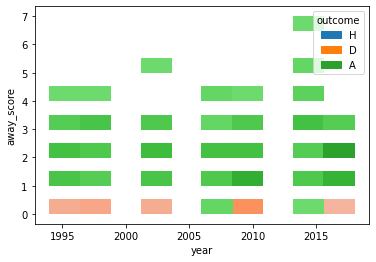

In [ ]:
sns.histplot(data = df, x = 'year', y = 'away_score', hue = 'outcome')

The next few graphs show some heat maps of the rankings of the team versus a few different variables - wins, losses, goals for, goals against and total games played. In general, this shows what would be expected. Teams with more wins are ranked higher (1 is highest). This makes sense because winning is the goal - the more a team wins, the higher they should be ranked. We also see high ranked teams with some of the greatest number of losses. This probably comes from the fact that the highest ranked teams are also playing the most games as seen in the last heat map. These high ranked teams are playing more games in general than lower ranked teams. This might result in more losses but they still are producing more wins as well. 

We choose not to include the ELO ratings because it favors teams that play more games on the world stage.   Since we had two different rankings the FIFA rankings seemed like a more natural choice to use because it didn't present with any biases and was more straight forward.

In a similar fashion with wins and losses, the highest ranked teams are producing the most goals. They have scored upwards of 2500 goals for their team, while only allowing 1600 goals scored against them. This makes sense because to win, a team must score more than their opponent so more goals results in more wins. 

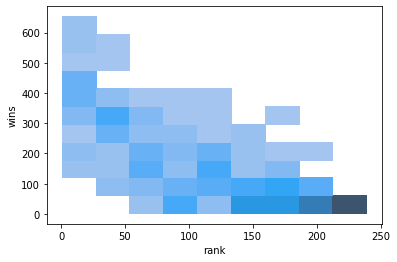

In [ ]:
sns.histplot(data = elo_rating_df, x = 'rank', y = 'wins')

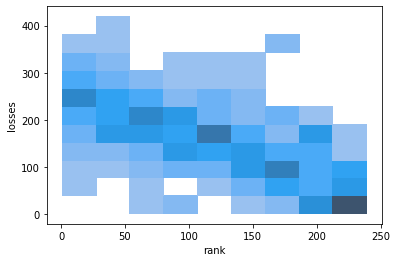

In [ ]:
sns.histplot(data = elo_rating_df, x = 'rank', y = 'losses')


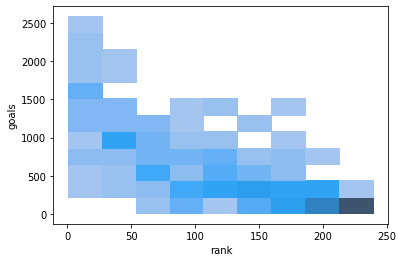

In [ ]:
sns.histplot(data = elo_rating_df, x = 'rank', y = 'goals')

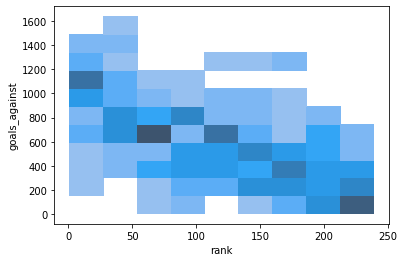

In [ ]:
sns.histplot(data = elo_rating_df, x = 'rank', y = 'goals_against')

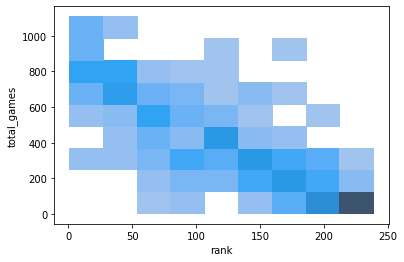

In [ ]:
sns.histplot(data = elo_rating_df, x = 'rank', y = 'total_games')

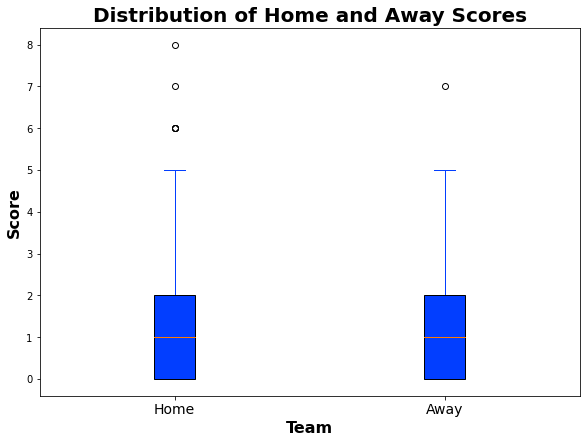

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of home and away scores
home_score = df['home_score']
away_score = df['away_score']
scores = [home_score, away_score]
 
# Choose a different color palette
sns.set_palette("bright")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))
bp = ax.boxplot(scores, patch_artist=True)

# Change the color of the boxes, whiskers, and caps
for patch in bp['whiskers']:
    patch.set_color(sns.color_palette()[0])
for patch in bp['caps']:
    patch.set_color(sns.color_palette()[0])

# Customize the axis labels and title
ax.set_xlabel("Team", fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_ylabel("Score", fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set_title("Distribution of Home and Away Scores", fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Customize the tick marks and tick labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Home', 'Away'], fontsize=14)
ax.set_yticks(range(0, max(home_score.max(), away_score.max()) + 1))

# Adjust the plot layout
fig.subplots_adjust(bottom=0.15, left=0.15)

# Display the plot
plt.show()


The above box plot shows that there is probably not a home or away advantage to these tournaments. This is probably due to the international nature of these tournaments so basically every team is playing away from their home field. The home and away teams are basically arbitrary in international play. The home team does see more outliers but home and away goals are virtually identical otherwise. 

In [ ]:
import numpy as np
conditions = [
    (df['home_score'] < df['away_score']),
    (df['away_score'] < df['home_score']),
    (df['home_score'] == df['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = [df['away_team'], df['home_team'], 'Tie']

# create a new column and use np.select to assign values to it using our lists as arguments
df['winner'] = np.select(conditions, values)

# display updated DataFrame
df.head()

<ipython-input-60-ac1093549bd0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = np.select(conditions, values)


,year,stage,home_team,away_team,home_score,away_score,outcome,home_team_rank,away_team_rank,winner
464,1994,Group C,Germany,Bolivia,1,0,H,1,43,Germany
465,1994,Group C,Spain,South Korea,2,2,D,5,37,Tie
466,1994,Group A,Colombia,Romania,1,3,A,17,7,Romania
467,1994,Group E,Italy,Republic of Ireland,0,1,A,4,14,Republic of Ireland
468,1994,Group A,United States,Switzerland,1,1,D,23,12,Tie


In [ ]:
winner_df = df[df['winner'] != 'Tie']

In [ ]:
winner_count = winner_df.groupby(by=["winner"], dropna=False)['year'].count().sort_values(ascending=False)

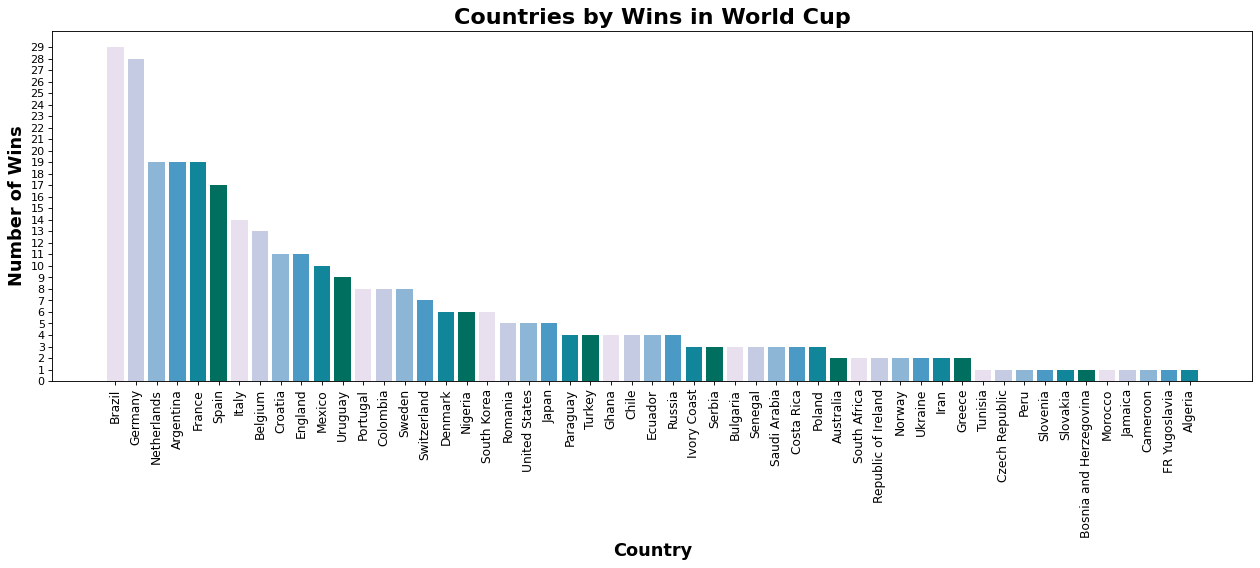

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 6), dpi=80)

# Plot the bar chart
plt.bar(winner_count.index, winner_count.values, color=sns.color_palette("PuBuGn"))

# Add axis labels and a title
plt.xlabel('Country', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.ylabel('Number of Wins', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.title('Countries by Wins in World Cup', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Customize the tick marks and tick labels
plt.xticks(rotation=90, fontsize=11)
plt.yticks(range(0, max(winner_count.values)+1))

# Adjust the plot layout
plt.subplots_adjust(bottom=0.15, left=0.15)

# Display the plot
plt.show()


The above graph shows the total number of wins by country in the world cup tournament since 1994. As expected, Brazil, whom consistently remains a top ranked team is shown to have the most wins, followed closely by Germany. Other typically strong teams follow in the Netherlands, Argentina, France and Spain and then the wins begin to taper off more and more with each country. 

In [ ]:
year_count = df.groupby(by=["year"], dropna=False)['year'].count()

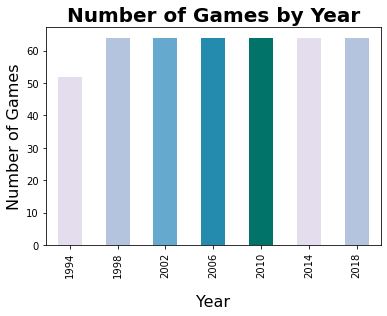

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
sns.set_palette("PuBuGn", n_colors=5)

# Plot the bar chart
year_count.plot.bar(color=sns.color_palette())

# Add axis labels and a title
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Number of Games', fontdict={'fontsize': 16})
plt.title('Number of Games by Year', fontdict={'fontsize': 20, 'fontweight': 'bold'})

plt.gca().xaxis.set_label_coords(0.5, -0.225)

# Display the plot
plt.show()

In [ ]:
stage_count = df.groupby(by=["stage"], dropna=False)

The graph above was mentioned earlier on and shows the total number games played in each world cup contest. The 1994 games had two less groups in the group stage, with 1996 becoming the first year to hold the 8 groups of four to start the tournament which is how the format still stands. 

In [ ]:
print(df.groupby(by=["stage"], dropna=False))

In [ ]:
df['stage'].value_counts()

Round of 16      56
Group C          42
Group E          42
Group F          42
Group B          42
Group A          41
Group D          41
Group H          36
Group G          36
Quarterfinals    28
Semifinals       14
Third place       7
Final             7
 Group A          1
Group D           1
Name: stage, dtype: int64

(array([2., 2., 1., 0., 1., 0., 2., 6., 0., 1.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

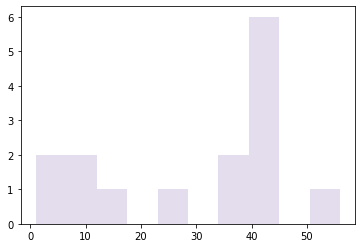

In [ ]:
plt.hist(df['stage'].value_counts())


Creation of the Simulator

Now that the data has been explored and the final training data set has been created, a simulation needs to be produced for the scores of the teams that will play in the 2022 FIFA world cup. The simulator being created, as the name suggests, simulate the tournament based on the last five games each team participated in (lastfive data set). A poisson distribution is created using the average goals a home team scored and a random drawing from the distribution is stored followed by a poisson distrubution of the average number of goals their opponent (away team) allowed  to be scored against them is created and a random drawing is also stored.  The average between these two numbers is obtained and this is used as the home team score.  This is done following the away team score and the goals the home team allowed to be scored to produce the away team score.  This process is repeated for the number of iterations placed into the function and the results are averaged to find the simulated home team and away team scores used for testing.

In [ ]:
# Creating the simulator
from scipy.stats import poisson
def sim(home,away,niterations):
    
    # Generating home score
    homescore=[]
    z=0
    while (z < len(home)):
        mu = lastfive.loc[lastfive['country']==home[z]]['goals_for'].values[0]
        mu = mu / 5
        mu2 = lastfive.loc[lastfive['country']==away[z]]['goals_against'].values[0]
        mu2 = mu2 / 5
        z=z+1
        homescoretemp=[]
        i=0
        while (i < niterations +1):
            a=poisson.rvs(1,mu,size=1)[0]
            a2=poisson.rvs(1,mu2,size=1)[0]
            predhomescore=(a+a2)/2
            homescoretemp.append(predhomescore)
            i=i+1
        b=0    
        for item in homescoretemp:
            b=item+b
        c=round(b/(len(homescoretemp)))
        homescore.append(c)
        
            # Generating home score
    awayscore=[]
    z=0
    while (z < len(away)):
        mu = lastfive.loc[lastfive['country']==away[z]]['goals_for'].values[0]
        mu = mu / 5
        mu2 = lastfive.loc[lastfive['country']==home[z]]['goals_against'].values[0]
        mu2 = mu2 / 5
        z=z+1
        awayscoretemp=[]
        i=0
        while (i < niterations +1):
            a=poisson.rvs(1,mu,size=1)[0]
            a2=poisson.rvs(1,mu2,size=1)[0]
            predawayscore=(a+a2)/2
            awayscoretemp.append(predawayscore)
            i=i+1
        b=0    
        for item in awayscoretemp:
            b=item+b
        c=round(b/(len(awayscoretemp)))
        awayscore.append(c)
        
    return homescore, awayscore

In [ ]:
# finding the simulated scores for known teams
# was run at 100000 and will be loaded from csv later kept at 1 for new coding done.
homescore,awayscore = sim(home,away,100000)
print('Home:',homescore)
print('Away:',awayscore)

Home: [2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 1, 1, 3, 1, 2, 3]
Away: [2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 1]


Transforming the Data to numeric representations of the categorical.

The stage data contains categorical data which for the purposes of the simulation will need to be transformed to numerical. As it currently stands, the stage is written out as 'Group #', 'Round of 16', 'Quarterfinals', 'Semifinals', 'Third Place' and 'Finals'. This would cause a problem within the simulation so each stage category is given a number - 1 to 13. 

The same issue arises with the home and away teams so each country is assigned a number, making sure that the number is the same for both its home and away column variables. For example, Germany becomes team '1' in both the home and away teams columns of the data frame. 

In [ ]:
#putting stage in a list to transform to numerical
stage=df['stage'].to_list()

In [ ]:
# transforming stage to numerical data
stage2=[]
for label in stage:
  if label == 'Group A':
    stage2.append(1)
  if label == ' Group A':
    stage2.append(1)
  if label == 'Group B':
    stage2.append(2)
  if label == 'Group C':
    stage2.append(3)
  if label == 'Group D':
    stage2.append(4)
  if label == 'Group D ':
    stage2.append(4)
  if label == 'Group E':
    stage2.append(5)
  if label == 'Group F':
    stage2.append(6)
  if label == 'Group G':
    stage2.append(7)
  if label == 'Group H':
    stage2.append(8)
  if label == 'Round of 16':
    stage2.append(9)
  if label == 'Quarterfinals':
    stage2.append(10)
  if label == 'Semifinals':
    stage2.append(11)
  if label == 'Third place':
    stage2.append(12)
  if label == 'Final':
    stage2.append(13)

In [ ]:
# Obtaining the home and away team for transformations to numerical data
home2=df['home_team'].to_list()
away2=df['away_team'].to_list()

In [ ]:
# transforming home teams to numerical data
home3=[]
for teamname in home2:
  if teamname == 'Germany':
    home3.append(1)
  if teamname == 'Spain':
    home3.append(2)
  if teamname == 'Colombia':
    home3.append(3)
  if teamname == 'Italy':
    home3.append(4)
  if teamname == 'United States':
    home3.append(5)
  if teamname == 'Belgium':
    home3.append(6)
  if teamname == 'Cameroon':
    home3.append(7)
  if teamname == 'Norway':
    home3.append(8)
  if teamname == 'Brazil':
    home3.append(9)
  if teamname == 'Netherlands':
    home3.append(10)
  if teamname == 'Argentina':
    home3.append(11)
  if teamname == 'Nigeria':
    home3.append(12)
  if teamname == 'Romania':
    home3.append(13)
  if teamname == 'South Korea':
    home3.append(14)
  if teamname == 'Mexico':
    home3.append(15)
  if teamname == 'Sweden':
    home3.append(16)
  if teamname == 'Saudi Arabia':
    home3.append(17)
  if teamname == 'Bulgaria':
    home3.append(18)
  if teamname == 'Switzerland':
    home3.append(19)
  if teamname == 'Bolivia':
    home3.append(20)
  if teamname == 'Republic of Ireland':
    home3.append(21)
  if teamname == 'Russia':
    home3.append(22)
  if teamname == 'Morocco':
    home3.append(23)
  if teamname == 'Greece':
    home3.append(24)
  if teamname == 'France':
    home3.append(25)
  if teamname == 'Paraguay':
    home3.append(26)
  if teamname == 'Jamaica':
    home3.append(27)
  if teamname == 'FR Yugoslavia':
    home3.append(28)
  if teamname == 'England':
    home3.append(29)
  if teamname == 'Scotland':
    home3.append(30)
  if teamname == 'Chile':
    home3.append(31)
  if teamname == 'South Africa':
    home3.append(32) 
  if teamname == 'Japan':
    home3.append(33)
  if teamname == 'Uruguay':
    home3.append(34)
  if teamname == 'Croatia':
    home3.append(35)
  if teamname == 'China PR':
    home3.append(36)
  if teamname == 'Denmark':
    home3.append(37)
  if teamname == 'Costa Rica':
    home3.append(38)
  if teamname == 'Portugal':
    home3.append(39)
  if teamname == 'Tunisia':
    home3.append(40)
  if teamname == 'Senegal':
    home3.append(41)
  if teamname == 'Slovenia':
    home3.append(42)
  if teamname == 'Ecuador':
    home3.append(43)
  if teamname == 'Turkey':
    home3.append(44)
  if teamname == 'Poland':
    home3.append(45)
  if teamname == 'Trinidad and Tobago':
    home3.append(46)
  if teamname == 'Angola':
    home3.append(47)
  if teamname == 'Serbia':
    home3.append(48)
  if teamname == 'Australia':
    home3.append(49)
  if teamname == 'Czech Republic':
    home3.append(50) 
  if teamname == 'Togo':
    home3.append(51)
  if teamname == 'Iran':
    home3.append(52)
  if teamname == 'Ivory Coast':
    home3.append(53)
  if teamname == 'Ghana':
    home3.append(54)
  if teamname == 'Ukraine':
    home3.append(55)
  if teamname == 'Algeria':
    home3.append(56)
  if teamname == 'New Zealand':
    home3.append(57)
  if teamname == 'Honduras':
    home3.append(58)
  if teamname == 'Slovakia':
    home3.append(59)
  if teamname == 'North Korea':
    home3.append(60)
  if teamname == 'Bosnia and Herzegovina':
    home3.append(61)
  if teamname == 'Egypt':
    home3.append(62)
  if teamname == 'Peru':
    home3.append(63)
  if teamname == 'Iceland':
    home3.append(64)
  if teamname == 'Panama':
    home3.append(65)

In [ ]:
# transforming away teams to numerical data
away3=[]
for teamname in away2:
  if teamname == 'Germany':
    away3.append(1)
  if teamname == 'Spain':
    away3.append(2)
  if teamname == 'Colombia':
    away3.append(3)
  if teamname == 'Italy':
    away3.append(4)
  if teamname == 'United States':
    away3.append(5)
  if teamname == 'Belgium':
    away3.append(6)
  if teamname == 'Cameroon':
    away3.append(7)
  if teamname == 'Norway':
    away3.append(8)
  if teamname == 'Brazil':
    away3.append(9)
  if teamname == 'Netherlands':
    away3.append(10)
  if teamname == 'Argentina':
    away3.append(11)
  if teamname == 'Nigeria':
    away3.append(12)
  if teamname == 'Romania':
    away3.append(13)
  if teamname == 'South Korea':
    away3.append(14)
  if teamname == 'Mexico':
    away3.append(15)
  if teamname == 'Sweden':
    away3.append(16)
  if teamname == 'Saudi Arabia':
    away3.append(17)
  if teamname == 'Bulgaria':
    away3.append(18)
  if teamname == 'Switzerland':
    away3.append(19)
  if teamname == 'Bolivia':
    away3.append(20)
  if teamname == 'Republic of Ireland':
    away3.append(21)
  if teamname == 'Russia':
    away3.append(22)
  if teamname == 'Morocco':
    away3.append(23)
  if teamname == 'Greece':
    away3.append(24)
  if teamname == 'France':
    away3.append(25)
  if teamname == 'Paraguay':
    away3.append(26)
  if teamname == 'Jamaica':
    away3.append(27)
  if teamname == 'FR Yugoslavia':
    away3.append(28)
  if teamname == 'England':
    away3.append(29)
  if teamname == 'Scotland':
    away3.append(30)
  if teamname == 'Chile':
    away3.append(31)
  if teamname == 'South Africa':
    away3.append(32) 
  if teamname == 'Japan':
    away3.append(33)
  if teamname == 'Uruguay':
    away3.append(34)
  if teamname == 'Croatia':
    away3.append(35)
  if teamname == 'China PR':
    away3.append(36)
  if teamname == 'Denmark':
    away3.append(37)
  if teamname == 'Costa Rica':
    away3.append(38)
  if teamname == 'Portugal':
    away3.append(39)
  if teamname == 'Tunisia':
    away3.append(40)
  if teamname == 'Senegal':
    away3.append(41)
  if teamname == 'Slovenia':
    away3.append(42)
  if teamname == 'Ecuador':
    away3.append(43)
  if teamname == 'Turkey':
    away3.append(44)
  if teamname == 'Poland':
    away3.append(45)
  if teamname == 'Trinidad and Tobago':
    away3.append(46)
  if teamname == 'Angola':
    away3.append(47)
  if teamname == 'Serbia':
    away3.append(48)
  if teamname == 'Australia':
    away3.append(49)
  if teamname == 'Czech Republic':
    away3.append(50) 
  if teamname == 'Togo':
    away3.append(51)
  if teamname == 'Iran':
    away3.append(52)
  if teamname == 'Ivory Coast':
    away3.append(53)
  if teamname == 'Ghana':
    away3.append(54)
  if teamname == 'Ukraine':
    away3.append(55)
  if teamname == 'Algeria':
    away3.append(56)
  if teamname == 'New Zealand':
    away3.append(57)
  if teamname == 'Honduras':
    away3.append(58)
  if teamname == 'Slovakia':
    away3.append(59)
  if teamname == 'North Korea':
    away3.append(60)
  if teamname == 'Bosnia and Herzegovina':
    away3.append(61)
  if teamname == 'Egypt':
    away3.append(62)
  if teamname == 'Peru':
    away3.append(63)
  if teamname == 'Iceland':
    away3.append(64)
  if teamname == 'Panama':
    away3.append(65)
  if teamname == 'Austria':
    away3.append(66)

In [ ]:
# adding numerical data to data frams
df['hometeam']=home3
df['awayteam']=away3
df['stage2']=stage2

<ipython-input-77-39445877e334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hometeam']=home3
<ipython-input-77-39445877e334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['awayteam']=away3
<ipython-input-77-39445877e334>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [ ]:
#Splitting the data to X and y
y=df['outcome']
X=df

In [ ]:
# Dropping non numerical data and the labels (y)
df.drop('winner',axis=1,inplace=True)
df.drop('outcome',axis=1,inplace=True)
df.drop('stage',axis=1,inplace=True)
df.drop('home_team',axis=1,inplace=True)
df.drop('away_team',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df

,year,home_score,away_score,home_team_rank,away_team_rank,hometeam,awayteam,stage2
464,1994,1,0,1,43,1,20,3
465,1994,2,2,5,37,2,14,3
466,1994,1,3,17,7,3,13,1
467,1994,0,1,4,14,4,21,5
468,1994,1,1,23,12,5,19,1
...,...,...,...,...,...,...,...,...
895,2018,2,2,70,20,22,35,10
896,2018,1,0,7,3,25,6,11
897,2018,2,1,20,12,35,29,11
898,2018,2,0,3,12,6,29,12


Testdf Transformations

In [ ]:
# Using the away team function for 2022
away_team_rank_test=[]
away_team_rank_test.append(rank_away_lookup(testdf,rankdf,2022))

In [ ]:
# taking the list and selecting items from each list in the list and placing them into one new list
away_rank_test = []
for lista in away_team_rank_test:
    for rank in lista:
        away_rank_test.append(rank)

In [ ]:
# Using the home team function for 2022
home_team_rank_test=[]
home_team_rank_test.append(rank_home_lookup(testdf,rankdf,2022))

In [ ]:
# taking the list and selecting items from each list in the list and placing them into one new list
home_rank_test = []
for lista in home_team_rank_test:
    for rank in lista:
        home_rank_test.append(rank)

In [ ]:
# adding the ranks to the testdf
testdf['home_team_rank']=away_rank_test
testdf['away_team_rank']=home_rank_test

In [ ]:
#obtaining the home and away list for the test df in list form
home4 = testdf['home_team'].to_list()
away4 = testdf['away_team'].to_list()

In [ ]:
home5=[]
for teamname in home4:
  if teamname == 'Germany':
    home5.append(1)
  if teamname == 'Spain':
    home5.append(2)
  if teamname == 'Colombia':
    home5.append(3)
  if teamname == 'Italy':
    home5.append(4)
  if teamname == 'United States':
    home5.append(5)
  if teamname == 'Belgium':
    home5.append(6)
  if teamname == 'Cameroon':
    home5.append(7)
  if teamname == 'Norway':
    home5.append(8)
  if teamname == 'Brazil':
    home5.append(9)
  if teamname == 'Netherlands':
    home5.append(10)
  if teamname == 'Argentina':
    home5.append(11)
  if teamname == 'Nigeria':
    home5.append(12)
  if teamname == 'Romania':
    home5.append(13)
  if teamname == 'South Korea':
    home5.append(14)
  if teamname == 'Mexico':
    home5.append(15)
  if teamname == 'Sweden':
    home5.append(16)
  if teamname == 'Saudi Arabia':
    home5.append(17)
  if teamname == 'Bulgaria':
    home5.append(18)
  if teamname == 'Switzerland':
    home5.append(19)
  if teamname == 'Bolivia':
    home5.append(20)
  if teamname == 'Republic of Ireland':
    home5.append(21)
  if teamname == 'Russia':
    home5.append(22)
  if teamname == 'Morocco':
    home5.append(23)
  if teamname == 'Greece':
    home5.append(24)
  if teamname == 'France':
    home5.append(25)
  if teamname == 'Paraguay':
    home5.append(26)
  if teamname == 'Jamaica':
    home5.append(27)
  if teamname == 'FR Yugoslavia':
    home5.append(28)
  if teamname == 'England':
    home5.append(29)
  if teamname == 'Scotland':
    home5.append(30)
  if teamname == 'Chile':
    home5.append(31)
  if teamname == 'South Africa':
    home5.append(32) 
  if teamname == 'Japan':
    home5.append(33)
  if teamname == 'Uruguay':
    home5.append(34)
  if teamname == 'Croatia':
    home5.append(35)
  if teamname == 'China PR':
    home5.append(36)
  if teamname == 'Denmark':
    home5.append(37)
  if teamname == 'Costa Rica':
    home5.append(38)
  if teamname == 'Portugal':
    home5.append(39)
  if teamname == 'Tunisia':
    home5.append(40)
  if teamname == 'Senegal':
    home5.append(41)
  if teamname == 'Slovenia':
    home5.append(42)
  if teamname == 'Ecuador':
    home5.append(43)
  if teamname == 'Turkey':
    home5.append(44)
  if teamname == 'Poland':
    home5.append(45)
  if teamname == 'Trinidad and Tobago':
    home5.append(46)
  if teamname == 'Angola':
    home5.append(47)
  if teamname == 'Serbia':
    home5.append(48)
  if teamname == 'Australia':
    home5.append(49)
  if teamname == 'Czech Republic':
    home5.append(50) 
  if teamname == 'Togo':
    home5.append(51)
  if teamname == 'Iran':
    home5.append(52)
  if teamname == 'Ivory Coast':
    home5.append(53)
  if teamname == 'Ghana':
    home5.append(54)
  if teamname == 'Ukraine':
    home5.append(55)
  if teamname == 'Algeria':
    home5.append(56)
  if teamname == 'New Zealand':
    home5.append(57)
  if teamname == 'Honduras':
    home5.append(58)
  if teamname == 'Slovakia':
    home5.append(59)
  if teamname == 'North Korea':
    home5.append(60)
  if teamname == 'Bosnia and Herzegovina':
    home5.append(61)
  if teamname == 'Egypt':
    home5.append(62)
  if teamname == 'Peru':
    home5.append(63)
  if teamname == 'Iceland':
    home5.append(64)
  if teamname == 'Panama':
    home5.append(65)
  if teamname == 'Canada':
    home5.append(67)
  if teamname == 'Qatar':
    home5.append(68)
  if teamname == 'Wales':
    home5.append(69)

In [ ]:
away5=[]
for teamname in away4:
  if teamname == 'Germany':
    away5.append(1)
  if teamname == 'Spain':
    away5.append(2)
  if teamname == 'Colombia':
    away5.append(3)
  if teamname == 'Italy':
    away5.append(4)
  if teamname == 'United States':
    away5.append(5)
  if teamname == 'Belgium':
    away5.append(6)
  if teamname == 'Cameroon':
    away5.append(7)
  if teamname == 'Norway':
    away5.append(8)
  if teamname == 'Brazil':
    away5.append(9)
  if teamname == 'Netherlands':
    away5.append(10)
  if teamname == 'Argentina':
    away5.append(11)
  if teamname == 'Nigeria':
    away5.append(12)
  if teamname == 'Romania':
    away5.append(13)
  if teamname == 'South Korea':
    away5.append(14)
  if teamname == 'Mexico':
    away5.append(15)
  if teamname == 'Sweden':
    away5.append(16)
  if teamname == 'Saudi Arabia':
    away5.append(17)
  if teamname == 'Bulgaria':
    away5.append(18)
  if teamname == 'Switzerland':
    away5.append(19)
  if teamname == 'Bolivia':
    away5.append(20)
  if teamname == 'Republic of Ireland':
    away5.append(21)
  if teamname == 'Russia':
    away5.append(22)
  if teamname == 'Morocco':
    away5.append(23)
  if teamname == 'Greece':
    away5.append(24)
  if teamname == 'France':
    away5.append(25)
  if teamname == 'Paraguay':
    away5.append(26)
  if teamname == 'Jamaica':
    away5.append(27)
  if teamname == 'FR Yugoslavia':
    away5.append(28)
  if teamname == 'England':
    away5.append(29)
  if teamname == 'Scotland':
    away5.append(30)
  if teamname == 'Chile':
    away5.append(31)
  if teamname == 'South Africa':
    away5.append(32) 
  if teamname == 'Japan':
    away5.append(33)
  if teamname == 'Uruguay':
    away5.append(34)
  if teamname == 'Croatia':
    away5.append(35)
  if teamname == 'China PR':
    away5.append(36)
  if teamname == 'Denmark':
    away5.append(37)
  if teamname == 'Costa Rica':
    away5.append(38)
  if teamname == 'Portugal':
    away5.append(39)
  if teamname == 'Tunisia':
    away5.append(40)
  if teamname == 'Senegal':
    away5.append(41)
  if teamname == 'Slovenia':
    away5.append(42)
  if teamname == 'Ecuador':
    away5.append(43)
  if teamname == 'Turkey':
    away5.append(44)
  if teamname == 'Poland':
    away5.append(45)
  if teamname == 'Trinidad and Tobago':
    away5.append(46)
  if teamname == 'Angola':
    away5.append(47)
  if teamname == 'Serbia':
    away5.append(48)
  if teamname == 'Australia':
    away5.append(49)
  if teamname == 'Czech Republic':
    away5.append(50) 
  if teamname == 'Togo':
    away5.append(51)
  if teamname == 'Iran':
    away5.append(52)
  if teamname == 'Ivory Coast':
    away5.append(53)
  if teamname == 'Ghana':
    away5.append(54)
  if teamname == 'Ukraine':
    away5.append(55)
  if teamname == 'Algeria':
    away5.append(56)
  if teamname == 'New Zealand':
    away5.append(57)
  if teamname == 'Honduras':
    away5.append(58)
  if teamname == 'Slovakia':
    away5.append(59)
  if teamname == 'North Korea':
    away5.append(60)
  if teamname == 'Bosnia and Herzegovina':
    away5.append(61)
  if teamname == 'Egypt':
    away5.append(62)
  if teamname == 'Peru':
    away5.append(63)
  if teamname == 'Iceland':
    away5.append(64)
  if teamname == 'Panama':
    away5.append(65)
  if teamname == 'Austria':
    away5.append(66)
  if teamname == 'Canada':
    away5.append(67)
  if teamname == 'Qatar':
    away5.append(68)
  if teamname == 'Wales':
    away5.append(69)

In [ ]:
# obtaining stages
stage3=testdf['stage'].to_list()

In [ ]:
stage4=[]
for label in stage3:
  if label == 'Group A':
    stage4.append(1)
  if label == ' Group A':
    stage4.append(1)
  if label == 'Group B':
    stage4.append(2)
  if label == 'Group C':
    stage4.append(3)
  if label == 'Group D':
    stage4.append(4)
  if label == 'Group D ':
    stage4.append(4)
  if label == 'Group E':
    stage4.append(5)
  if label == 'Group F':
    stage4.append(6)
  if label == 'Group G':
    stage4.append(7)
  if label == 'Group H':
    stage4.append(8)
  if label == 'Round of 16':
    stage4.append(9)
  if label == 'Quarterfinals':
    stage4.append(10)
  if label == 'Semifinals':
    stage4.append(11)
  if label == 'Third place':
    stage4.append(12)
  if label == 'Final':
    stage4.append(13)

In [ ]:
testdf['hometeam']=home5
testdf['awayteam']=away5
testdf['stage2']=stage4
testdf['home_score']=homescore
testdf['away_score']=awayscore

In [ ]:
ytest = testdf['outcome']

In [ ]:
testdf.drop('stage',axis=1,inplace=True)
testdf.drop('home_team',axis=1,inplace=True)
testdf.drop('away_team',axis=1,inplace=True)
testdf.drop('outcome',axis=1,inplace=True)

In [ ]:
# Setting the columns in the correct order for later
testdf = testdf[['year',	'home_score',	'away_score',	'home_team_rank',	'away_team_rank',	'hometeam',	'awayteam',	'stage2']]

In [ ]:
testdf

,year,home_score,away_score,home_team_rank,away_team_rank,hometeam,awayteam,stage2
0,2022,2,2,44,50,68,43,1
1,2022,2,3,8,18,41,10,1
2,2022,2,2,18,50,68,41,1
3,2022,2,1,44,8,10,43,1
4,2022,2,1,18,44,43,41,1
...,...,...,...,...,...,...,...,...
59,2022,1,2,9,22,23,39,10
60,2022,3,1,12,3,11,35,11
61,2022,1,2,22,4,25,23,11
62,2022,2,1,22,12,35,23,12


In [ ]:
# saving the dataframe
testdf.to_csv('testdf.csv')
#Loading the testdf with simulator run 100,000 times
testdf = pd.read_csv('testdf.csv')
testdf.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
testdf

,year,home_score,away_score,home_team_rank,away_team_rank,hometeam,awayteam,stage2
0,2022,2,2,44,50,68,43,1
1,2022,2,3,8,18,41,10,1
2,2022,2,2,18,50,68,41,1
3,2022,2,1,44,8,10,43,1
4,2022,2,1,18,44,43,41,1
...,...,...,...,...,...,...,...,...
59,2022,1,2,9,22,23,39,10
60,2022,3,1,12,3,11,35,11
61,2022,1,2,22,4,25,23,11
62,2022,2,1,22,12,35,23,12


Above is the final test data frame after all of the transformations. All categorical data was converted to numerical and then inserted into the dataframe, while removing the old categorical data. At this point the models are ready to be created. 

Model Creation

Naive Bayes

In [ ]:
# import the module
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

In [ ]:
# initialize the model
mnb = MultinomialNB()

In [ ]:
import time
start = time.time()

# use the training data to train the model
mnb_model = mnb.fit(X,y)

# FInding the compute time
end = time.time()
final_time_mnb = end-start
print(final_time_mnb)

0.009229421615600586


In [ ]:
#cross validation score
mnb_cv_scores = cross_val_predict(mnb, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_cv_scores, labels=['H',
                                              'D',
                                              'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H',
                'D',
                'A']
mnb_report= classification_report(y, mnb_cv_scores, target_names=target_names)
print(mnb_report)

[[141  28  39]
 [ 30  16  35]
 [ 36  19  92]]

              precision    recall  f1-score   support

           H       0.55      0.63      0.59       147
           D       0.25      0.20      0.22        81
           A       0.68      0.68      0.68       208

    accuracy                           0.57       436
   macro avg       0.50      0.50      0.50       436
weighted avg       0.56      0.57      0.56       436



The first model created was the multinomial Naive Bayes model. As can be seen from the report above, the accuracy for this model is not very high at just 57% accuracy. While a super high accuracy of 95% + might not have been expected, 57% still seems a little too low to have much confidence.

Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn = MLPClassifier(
                  hidden_layer_sizes=100, 
                  random_state=1, 
                  max_iter=1000,
                  shuffle=True,
                  )

In [ ]:
import time
start = time.time()

nn_model=nn.fit(X, y)
# Finding the compute time
end = time.time()
final_time_nn = end-start
print(final_time_nn)

0.11590886116027832


In [ ]:
#cross validation score
nn_cv_scores = cross_val_predict(nn, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, nn_cv_scores, labels=['H'
,'D'
,'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H',
                'D',
                'A']
nn_report= classification_report(y, nn_cv_scores, target_names=target_names)
print(nn_report)

The second model used a neural network to predict the outcome and we saw similar results to the naive bayes model. The neural network performed just slightly better at 59%, so while there is improvement, it is still probably too low of an accuracy rating to have a high level of confidence in this model as well. 

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
import time
start = time.time()
rf_model =rf.fit(X, y)
end = time.time()
final_time_rf = end-start
print(final_time_rf)

In [ ]:
#cross validation score
rf_cv_scores = cross_val_predict(rf, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, rf_cv_scores, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
rf_report= classification_report(y, rf_cv_scores, target_names=target_names)
print(rf_report)

The third model that was attempted was the random forest model. We see much more improvement with this model as we achieve a 77% accuracy rating. This is much better and closer to where we would like to see our models perform. It is worth noting that these first three models included draw outcomes. Part of the accuracy problem may stem from this because draws can only occur in the group stage of the tournament. After the group stages, the tournament is a single elimination tournament so there must be a winner and loser for every game after the group stage. This is why it is decided to attempt the models again after dropping draws from the model. 

Dropping Draws

In [ ]:
# adding y back into the data set so draws can be dropped
X['outcome']=y

In [ ]:
# Droping the draws
df.drop((df[df['outcome'] == 'D'].index), axis=0, inplace = True)

In [ ]:
# obtaining the new y values
y=X['outcome']

In [ ]:
# Removing the labels
X.drop('outcome',axis=1,inplace=True)

Naive Bayes

In [ ]:
# import the module
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

In [ ]:
# initialize the model
mnb2 = MultinomialNB()

In [ ]:
import time
start = time.time()

# use the training data to train the model
mnb_model2 = mnb2.fit(X,y)

# FInding the compute time
end = time.time()
final_time_mnb2 = end-start
print(final_time_mnb2)

In [ ]:
#cross validation score
mnb_cv_scores2 = cross_val_predict(mnb2, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_cv_scores2, labels=['H',
                                              #'D',
                                              'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H',
                #'D',
                'A']
mnb_report2= classification_report(y, mnb_cv_scores2, target_names=target_names)
print(mnb_report2)

As can be seen above, dropping draws had a positive impact on our results for the naive bayes model. The accuracy improved from just 57% to 73%. Again, we would like to see something higher than this but this shows a positive improvement and a step in the right direction. 

Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn2 = MLPClassifier(
                  hidden_layer_sizes=100, 
                  random_state=1, 
                  max_iter=1000,
                  shuffle=True,
                  )

In [ ]:
import time
start = time.time()

nn_model2=nn2.fit(X, y)
# Finding the compute time
end = time.time()
final_time_nn2 = end-start
print(final_time_nn2)

In [ ]:
#cross validation score
nn_cv_scores2 = cross_val_predict(nn2, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, nn_cv_scores2, labels=['H'
#,'D'
,'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H',
                #'D',
                'A']
nn_report2= classification_report(y, nn_cv_scores2, target_names=target_names)
print(nn_report2)

With both the neural network (above) and random forest (below) results, we see an accuracy rating that can give some confidence with the results. Both performed very well, giving a 94% accuracy rating which is a solid result.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf2 = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
import time
start = time.time()
rf_model2 =rf2.fit(X, y)
end = time.time()
final_time_rf2 = end-start
print(final_time_rf2)

In [ ]:
#cross validation score
rf_cv_scores2 = cross_val_predict(rf2, X, y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, rf_cv_scores2, labels=['H',
                                             #'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
#,'D'
,'A']
rf_report2= classification_report(y, rf_cv_scores2, target_names=target_names)
print(rf_report2)

Model Comparison of the Cross Validation accuracy

In [ ]:
#collecting accuracy from the reports
mnb_acc=float(mnb_report[258:261])
nn_acc=float(nn_report[258:261])
rf_acc=float(rf_report[258:261])
mnb2_acc=float(mnb_report2[204:207])
nn2_acc=float(nn_report2[204:207])
rf2_acc=float(rf_report2[204:207])


In [ ]:
import matplotlib.pyplot as plt


names = ['Naive Bayes \nwith draws \nAccuracy','Neural Network \nwith draws \nAccuracy','Random Forest \nwith draws \nAccuracy',
         'Naive Bayes \nwithout draws \nAccuracy','Neural Network \nwithout draws \nAccuracy','Random Forest \nwithout draws \nAccuracy',]  
values = [mnb_acc,nn_acc,rf_acc,mnb2_acc,nn2_acc,rf2_acc]
colors2 = ['yellow','red','blue','yellow','red','blue',]
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('Machine learning Accuracy comparison')

plt.show()

The above graph shows a comparison of the accuracy results for each model type. Based on this visualization, it would seem that both neural network and random forest with draws removed will give the best and most accurate options when ran on our test data.

Testing the test data

Naive Bayes with Draws

In [ ]:
X

In [ ]:
testdf

In [ ]:
# Predicting the test data
mnb_test_scores = mnb_model.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, mnb_test_scores, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
mnb_test_report= classification_report(ytest, mnb_test_scores, target_names=target_names)
print(mnb_test_report)

Neural Network  with Draws


In [ ]:
# Predicting the test data
nn_test_scores = nn_model.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, nn_test_scores, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
nn_test_report= classification_report(ytest, nn_test_scores, target_names=target_names)
print(nn_test_report)

Random Forest with Draws

In [ ]:
# Predicting the test data
rf_test_scores = rf_model.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, rf_test_scores, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
rf_test_report= classification_report(ytest, rf_test_scores, target_names=target_names)
print(rf_test_report)

Naive Bayes without Draws

In [ ]:
# Predicting the test data
mnb_test_scores2 = mnb_model2.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, mnb_test_scores2, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
mnb_test_report2= classification_report(ytest, mnb_test_scores2, target_names=target_names)
print(mnb_test_report2)

Neural Network without Draws

In [ ]:
# Predicting the test data
nn_test_scores2 = nn_model2.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, nn_test_scores2, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
nn_test_report2= classification_report(ytest, nn_test_scores2, target_names=target_names)
print(nn_test_report2)

Random Forest without Draws

In [ ]:
# Predicting the test data
rf_test_scores2 = rf_model2.predict(testdf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, rf_test_scores2, labels=['H',
                                             'D',
                                             'A'])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['H'
,'D'
,'A']
rf_test_report2= classification_report(ytest, rf_test_scores2, target_names=target_names)
print(rf_test_report2)

Test Accuracy Comparison

In [ ]:
#collecting accuracy from the reports
mnb_test_acc=float(mnb_test_report[258:261])
nn_test_acc=float(nn_test_report[258:261])
rf_test_acc=float(rf_test_report[258:261])
mnb2_test_acc=float(mnb_test_report2[258:261])
nn2_test_acc=float(nn_test_report2[258:261])
rf2_test_acc=float(rf_test_report2[258:261])

In [ ]:
import matplotlib.pyplot as plt


names = ['Naive Bayes \nwith draws \nAccuracy','Neural Network \nwith draws \nAccuracy','Random Forest \nwith draws \nAccuracy',
         'Naive Bayes \nwithout draws \nAccuracy','Neural Network \nwithout draws \nAccuracy','Random Forest \nwithout draws \nAccuracy',]  
values = [mnb_test_acc,nn_test_acc,rf_test_acc,mnb2_test_acc,nn2_test_acc,rf2_test_acc]
colors2 = ['yellow','red','blue','yellow','red','blue',]
plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names, values, color= colors2)
plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('Machine learning Test Accuracy comparison')

plt.show()

The highest performing models appeared to be the neural network, both with or without draws included in the training.  The highest accuracy being of the neural network without draws.  There is going to be an issue where any game that ends with a draw (only possible in the first round) will be predicted wrong - this can lead to teams not advancing if the model was to be used to predict the entire bracket.  This is why in the recommendation section it is stated how this model is recommended to be used and possible next steps based on these results. 

Recommendations:  The recommendations should be that for this model use the model to see who is going to win at each stage.  For instance in the first group stage use the model see what it predicts if it is for gaining information on other teams you have done that if it is for betting purposes then place your bets.  After the first round is finished take the teams that move on and place them into the model for predictions.  It is recommended that it be done this way because if a team gets a draw vs. the model predicting win or loss can greatly change if the team moves ahead in the competition.  This way each round will give a better end result.  With the first round out of the way there are no more draws and the remaining predictions should be that much better.   For future iterations of this project models could be built specifically for round 1 vs. further rounds so that it would be more accurate at predicting draws that could allow for two models which could predict an entire bracket.  Next the simulator would need to be more complicated including additional information.  Followed by more data dating further back.  We would attempt to find older rankings, try incorporating the ELO data and possibly best player statistics or goalie statisitics.

References:
2022 Qatar World Cup stats: XG, Corners, goals | footystats. (n.d.). Retrieved November 2, 2022, from https://footystats.org/world-cup 

Becklas, A. (2018, April 23). FIFA World Cup. Kaggle. Retrieved November 2, 2022, from https://www.kaggle.com/datasets/abecklas/fifa-world-cup 

Men's ranking. FIFA. (n.d.). Retrieved November 2, 2022, from https://www.fifa.com/fifa-world-ranking/men?dateId=id13792

Wikimedia Foundation. (2022, December 21). 2022 FIFA World Cup. Wikipedia. Retrieved November 2, 2022, from https://en.wikipedia.org/wiki/2022_FIFA_World_Cup 

World football elo ratings. World Football Elo Ratings. (n.d.). Retrieved November 2, 2022, from https://www.eloratings.net/ 

